##Milestone 1 Data Science: Max Motz and Alec Rovner:
We are using the IPUMS data set to compare and contrast public and private school students with a host of factors including post-grad salary, owned real-estate, veteran status, and many other factors in which we hope to utilize to find interesting correlations and trends with to analyze the difference in attending individuals and long-term effects of the two schooling systems. We are utilizing the IPUMS dataset to begin our project because it provides useful base information that can provide baselines as to where we would like to go with out project. 

Our collaboration plan is to utilize Google Drives Collab Feature to simultaneously work on a Python notebook. We will make regular commits to a github repository for version control and fork/work on independent copies of the file at times when we are both working on different aspects of the file. Our group will meet one to two times per week in order to recap what we have been working on and set goals for each of us to individually commit and push to the project by our next meeting. The majority of our meetings will take place in person on Wednesday night each week as we are both available then. 

Through the IPUMS data set, we hope to answer the question of “does attending private school from an early age versus public school really affect your outcome in life?”. This question can be answered using post graduate individual salaries from all of the points in the data set downloaded. Another question we hope to answer is “does the enrollment of public school really affect the chances of joining the military?”.  We will be using veteran status as a flag as to whether or not the individual enlisted in the military. 

In [ ]:
from google.colab import drive
import gzip
drive.mount('/content/drive')
%cd /content/drive/My Drive/cmps3160
# !git pull
%cd _projects/FinalProjectRovnerMotz

import numpy as np
import pandas as pd



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/cmps3160
/content/drive/My Drive/cmps3160/_projects/FinalProjectRovnerMotz


In [ ]:
#Current data set scope is one year for size purposes (larger sizes crash RAM)
a_file = gzip.open("usa_00004.csv.gz", "rb")
df = pd.read_csv(a_file, engine = 'python')
df.head()



,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,SCHLTYPE,INCTOT
0,2019,201901,1,2019010000088,11.0,2019000000011,220001,4,1,11.0,1,9000
1,2019,201901,2,2019010000096,70.0,2019000000021,100001,3,1,70.0,1,150
2,2019,201901,3,2019010000153,20.0,2019000000031,110001,4,1,20.0,2,1400
3,2019,201901,4,2019010000198,79.0,2019000000041,110001,3,1,79.0,1,22700
4,2019,201901,5,2019010000205,53.0,2019000000051,270101,3,1,53.0,1,0


A major issue we encountered while reading the dataset is that the initial dataset was crashing the ram during the reading process, as it was a huge 9GB files. We downsized it twice by narrowing the scope and amount of variables in the query before collab was able to read it in without crashing.

In [ ]:
df.keys()

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'SCHLTYPE', 'INCTOT'],
      dtype='object')

Variable Legend:
* YEAR (Census year)
* SAMPLE (IPUMS sample identifier)
* SERIAL (Household serial number)
* CBSERIAL (Original Census Bureau household serial number)
* HHWT (Household weight)
* CLUSTER (Household cluster for variance estimation)
* STRATA (Household strata for variance estimation)
* GQ (Group quarters status)
* PERNUM (Person number in sample unit)
* PERWT (Person weight)
* SCHLTYPE (Public or private school)
* INCTOT (Total personal income)

In [ ]:
tidydf = df.melt(id_vars=['SERIAL'], value_vars=['GQ','SCHLTYPE','INCTOT'])
tidydf

,SERIAL,variable,value
0,1,GQ,4
1,2,GQ,3
2,3,GQ,4
3,4,GQ,3
4,5,GQ,3
...,...,...,...
9718654,1428035,INCTOT,117000
9718655,1428035,INCTOT,14000
9718656,1428036,INCTOT,18500
9718657,1428037,INCTOT,49900


There are three types of variables within the dataset:

ID Related Variables: (Serial #s, year, sample)

Mathematical Variables: (Weights, Cluster, Strata, Pernum)

Categorical Variables: (School type, Group Quarters, Total Personal Income)

To format the data using .melt(), I put serial as the index var (other variables constant with current data query), and the categorical variables as the value variables. I left out the mathematical variables for now, however they may become relevant as value variables in the future as needed.

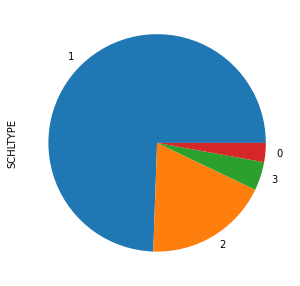

In [ ]:
#The School Type variable shows the proportion of indiviudals in the dataset and what school they go to
#0 is N/A
#1 is Not enrolled
#2 is Public School
#3 is private school
df["SCHLTYPE"].value_counts().plot.pie(y='mass', figsize=(5, 5))

In [ ]:
#Interesting Stat
PUBS = df["SCHLTYPE"].loc[df["SCHLTYPE"]== 2].sum()/2
PRIS = df["SCHLTYPE"].loc[df["SCHLTYPE"]== 3].sum()/3
PUBS / PRIS
#598521 / 137437
#There are over 4x as many public school kids in the dataset than private school kids

4.354875324694223

In [ ]:
#The Group Quarters variable idicates what living situation the individual resided in
#1 is Household under 1970 definition
#2 is Additional households under 1990 definition
#3 is Group quarters--Institutions
#4 is Other group quarters
#5 is Additional households under 2000 definition
df["GQ"].value_counts()

1    3081285
4      78375
3      72946
2       6006
5        941
Name: GQ, dtype: int64

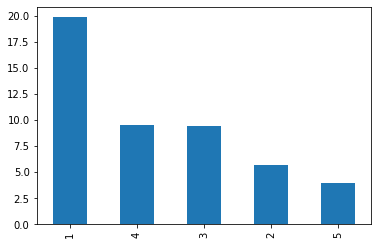

In [ ]:
(df["GQ"].value_counts() ** 0.2).plot.bar()

In [4]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/cmps3160/_projects/FinalProjectRovnerMotz/RovnerMotzFinalProject.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/cmps3160/_projects/FinalProjectRovnerMotz/RovnerMotzFinalProject.ipynb to html
[NbConvertApp] Writing 315459 bytes to /content/drive/MyDrive/cmps3160/_projects/FinalProjectRovnerMotz/RovnerMotzFinalProject.html
